# Midterm exam

This exam is open-notebook and open-web. It's also open-instructor, in the coding sections of the exam; if you run into a bug that you can't explain after a few tries, I'm willing to take a look at your code.

We start with three short essay questions, each of which can be answered in a paragraph or so. The first two paragraphs can be pretty brief. The third one might run a bit longer, or might become two paragraphs.

## Short essay questions.

#### 1. Overfitting.

What is "overfitting"? And why is this problem especially likely to arise when we model unstructured datasets (for instance, a collection of tweets or novels, rather than a simple table with five or six columns)?


Answer for 1:

Overfitting describes the problem that occurs when training a predictive model against the data you wish to build a predictive model for. Especially this is in encountered when using the entirety of a dataset to train the model you wish to use on that same dataset. With unstructured data, you encounter more issues with overfitting due to having more interpretation fall on the back of the algorithm instead of on the data, due to a lack of data constraints. For example, a table of rain fall numbers from countries across the US has both fewer pieces of data, when compared to a novel in a text file, and a uniform structure of data--e.g. a city name, a rain amount, and a date. With this uniform data structure, the algorithm is doing less interpretation.


#### 2. Cross-validation.

What does it mean to cross-validate a model? What's the point of doing this?

Answer for 2:

Cross-validation is the practice of using a portion of a dataset that you wish to test to train the predictive model, and to rotate the portion used for training and test the results. For example, if you have 100 batting averages for 100 players in the MLB, you'd use 25 players to train a model to predict batting average based on number of letters in a player's name (ridiculous, I know!), and then actually run the model on the remaining 75. Cross-validation would be rotating which 25 players are the training corpus and which 75 players are the test corpus. This way you, ideally, prevent the predictive model from not being a predictive model at all, but being overfit to your dataset, and merely an interpretive tool for it.


#### 3. Interpreting models of the human past.

Beyond general quantitative pitfalls like "overfitting," why does it become challenging to draw historical and cultural conclusions from a quantitative model?

Choose any (single) article from the set we discussed in the week of March 12, and explain why the interpretive problems it confronts emerge specifically from the complexity of the human subject-matter.

Answer for 3:

There are a number of reasons for the challenge. As David Bamman describes, it is important to remember that human subjective judgment is at the core of all computation, at some point. This human interpretation--in this piece, Dr. Bamman is looking at NLP functions, such as part of speech tagging, named entity recognition, etc.--is itself very subjective and abstract. Do we consider "the Olympics," for instance, a place, event or organization? Any question or decision tough for humans to answer will, necessarily, be tough for machines to answer, because it must be posed to a machine *by* a human. The fuzziness here is also apparent in that there is often no objective truth--many times things can be interpreted in two different ways to equal levels of validity. Edgar Allan Poe had both a wife and a cousin, and he was married to both, in the form of one person. While a simple analogy, this shows the issue with messy, abstract human data and more objective, concrete forms of computational analysis used to interpret, and pry some truth from, this messy data.

With the abstraction in data very high, what becomes important is the purpose of the analysis, and the defined scale of interpretation it puts forward. Dr. Bamman showed an interesting exercise with judging positivity of Romeo and Juliet, crowdsourcing sentiment analysis from 5 different humans on Mechanical Turk. There are areas of high variability between human assessors, illustrating the abstraction and variability of something as nebulous as "is this scene positive or negative on a scale of -5 to 5?" This goes to show that there will likely be variability in the machine interpretation as well, but hopefully it falls within the composite trajectory of the 5 humans put together. For me, the goal in this type of computational analysis is not a lofty idea of "real truth," whatever that might mean, and instead a goal of replication what a sample of humans might find to be true, in aggregate and on average. Because of this, it's not surprising that some will refute or take issue with conclusions from this type of analysis, as their interpretation might be very different. Similarly, what is true in the aggregate really has no bearing on what is true in one instance. Though it rains about half of the year in Dublin, Ireland, it doesn't mean, on any given day, it can't be sunny and clear.

## Coding questions.

### 1. Surviving the *Titanic.*

We have good records about the passengers who were aboard the *Titanic* when it sank in 1912. (The provenance of the data is difficult to track, but I think this particular form of the dataset comes from [a Kaggle machine learning competition.](https://www.kaggle.com/c/titanic))

Let's use a sample of the data to rehearse methods of exploratory data analysis in Pandas.

First, read in the dataset (```titanic.csv```). What do you have?

The dataset has twelve columns, but here are some important or perplexing ones:

    **Survived**: A value of 1 indicates that the passenger survived. 0, didn't.
    **Pclass**: Did the passenger buy a 1st, 2nd, or 3rd-class ticket?
    **Sex**: Is coded as "male" or "female." This may really be "gender," since I doubt that ticket agents checked the passengers' biological sex in 1912, but we'll let that pass.
    **Age**: In years.
    **Embarked**: Which port the passenger sailed from.
    **Sibsp**: How many siblings or spouses the passenger had on board.
    **Parch**: How many parents or children the passenger had on board.

Let's start by answering some simple questions.

#### 1. What percentage of passengers survived, overall?
#### 2. What was the gender balance, overall, among passengers? Say, what fraction were women?


In [2]:
import os, math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

# Import the dataset, and use the ```.head()``` method to glance at the first few rows.
cwd = os.getcwd()
# print('Current working directory: ' + cwd + '\n')     
relativepath = os.path.join('..', 'data', 'titanic.csv')
# print(relativepath)
titanic = pd.read_csv(relativepath)

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Insert code here to calculate (1) the fraction of passengers who survived, and (2) the fraction who were women.
# to calculate total number of passengers, I pull max for the PID column, which starts at 1 and is increased by 
# 1 for each passenger in the dataset:

num_passengers = titanic['PassengerId'].max()
num_passengers 

# titanic['Survived']

survive_count = titanic['Survived'].sum()
print('Passenger survivor total: ', survive_count)
death_count = num_passengers - survive_count
print('Passenger death total: ', death_count)

percent_survived = survive_count/num_passengers
print('Percentage of survivors: ', round((percent_survived*100),2), '%')

male = 'male'
female = 'female'

male_pass = 0
female_pass = 0
male_survivors = 0
female_survivors = 0

# titanic.head(150)

for psgr in titanic['Sex']:
    # print(psgr)
    if psgr == 'female':
        female_pass += 1
    else:
        male_pass += 1

percent_male = round((male_pass / num_passengers), 2)
percent_female = round((female_pass / num_passengers), 2)
        
print('Male passengers: ', male_pass)
print('Female passengers: ', female_pass)
print('Females make up ', (100*percent_female), '% of passengers overall')
print('Males make up ', (100*percent_male), '% of passengers overall')

Passenger survivor total:  342
Passenger death total:  549
Percentage of survivors:  38.38 %
Male passengers:  577
Female passengers:  314
Females make up  35.0 % of passengers overall
Males make up  65.0 % of passengers overall


#### 3. Now let's make that slightly more complex. Did the passengers really follow a policy of "women and children first"?

Let's start answer that by producing a bar graph that indicates how the probability of survival varied across Sex. In other words, we want to have one bar that indicates the probability of survival for men (not the raw number of men surviving but the *fraction* who survived), and a second bar indicating the probability for women.

You can use the split-apply-combine method from week 3 to summarize the data. Note that simply averaging (taking the mean) across a column that is either 0 or 1 will in effect give you the probability of finding a 1 in that column.

In [1]:
# (3): Code is needed here to split-apply-combine,
# and then produce a bar graph.

by_sex = titanic.groupby('Sex')
by_sex.head()

titanic_sex = by_sex.aggregate(np.sum)['Survived']
type(titanic_sex)

titanic_sex_df = pd.DataFrame(titanic_sex)
titanic_sex_df.head()

pass_sex_list = [314, 577] # passengers by sex, from above
psex = pd.Series(pass_sex_list)
titanic_sex_df['TotalPassengers'] = psex.values
titanic_sex_df.head()

# print(titanic_sex_df.columns)

grouped_surv = titanic_sex_df.groupby('Survived')
grouped_surv.head()

# # remember: two separate plot commands given in succession will render on the same plot. So, could create two dataframes
# # and give two plot calls, one for each, and this should work.

grouped_surv.plot(kind='bar')
plt.show()

NameError: name 'titanic' is not defined

#### 4. One final twist.

What about the relationship of "ticket class" to survival? And how did that interact with gender?

See if you can produce a visualization that plots probability of survival broken out by Pclass and Sex at the same time. For instance, it could take the form of two lines (one for men and one for women), with the y axis indicating probability of survival, and the x axis indicating ticket class (1, 2, or 3). It's also possible to achieve the same thing with a bar graph (using paired bars). We did a version of that in week 3. Either solution is fine.

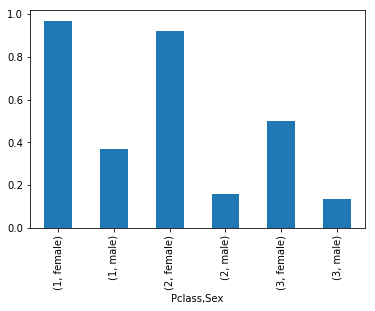

In [12]:
## (4): Code is needed here to produce a visualization that
## reveals probability of survival broken out by Pclass
## and Sex at the same time.

by_class = titanic.groupby(['Pclass','Sex']).aggregate(np.mean)['Survived']
by_class.head()

by_class.plot(kind='bar')
plt.show()

# Did this a bit different, as discussed, but the visualization should be the same, with an int before each label of 
#  male or female that indicates their class, and each bar indicating a probability of survival


### 2. Ham or spam?

Now let's move to predictive modeling of less structured data.

#### Part 1.

I've provided you with part of [a spam dataset developed by Almeida et al.](http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/) Each row in this dataset contains an SMS message. 747 of them were flagged by users as "spam," and 747 are legitimate--for our purposes, "ham." (In case this etymology is vanishing in the mists of time: spam was originally a kind of canned meat.)

There are two columns in the dataset. **Category** contains a flag indicating whether the message is spam; **text** contains the raw text of the message itself.

Your first goals are to:

1. Read this dataset (```hamorspam.csv```) in as a pandas DataFrame, and create a new column ```isspam```, which contains 1 if the row is spam, and 0 otherwise.

2. Create a termdoc matrix based on the top 1000 words in the dataset. Use the ```.head()``` method to print out a few rows.

3. Import multinomial Naive Bayes amd cross_val_score from sklearn; then do five-fold crossvalidation to estimate the accuracy of multinomial Naive Bayes on this dataset.

Try to do each of those things in a separate cell of this notebook. The homework solution from week 6 (Feb 19-25) should be a useful guide here.

In [6]:
# (1): Read in hamorspam.csv; create a numeric column "isspam."
cwd = os.getcwd()
relativepath = os.path.join('..', 'data', 'hamorspam.csv')
ham_spam = pd.read_csv(relativepath)
ham_spam.head(10)

,category,text
0,spam,You are being contacted by our dating service ...
1,spam,Please call our customer service representativ...
2,spam,Guess who am I?This is the first time I create...
3,spam,You have been selected to stay in 1 of 250 top...
4,spam,I don't know u and u don't know me. Send CHAT ...
5,ham,How's it going? Got any exciting karaoke type ...
6,ham,Yeah I can still give you a ride
7,ham,You are a very very very very bad girl. Or lady.
8,ham,Are we doing the norm tomorrow? I finish just ...
9,spam,Call FREEPHONE 0800 542 0578 now!


In [7]:
def spam_test(a_data_frame, rowidx):    
    if 'spam' in a_data_frame['category'][rowidx]:
        return 'spam'
    elif 'ham' in a_data_frame['category'][rowidx]:
        return 'ham'
    else:
        return 'other'
    
ham_or_spam = ham_spam['text']
source = []
for idx in ham_spam.index:
    source.append(spam_test(ham_spam, idx))
# print(source)

ham_spam_num = []

for item in ham_spam['category']:
    if item == 'ham':
        ham_spam_num.append(0)
    else:
        ham_spam_num.append(1)
        
# print(ham_spam_num)

hs_series = pd.Series(ham_spam_num)
# ham_spam['isspam'] = hs_series.values

ham_spam.head(15)

,category,text
0,spam,You are being contacted by our dating service ...
1,spam,Please call our customer service representativ...
2,spam,Guess who am I?This is the first time I create...
3,spam,You have been selected to stay in 1 of 250 top...
4,spam,I don't know u and u don't know me. Send CHAT ...
5,ham,How's it going? Got any exciting karaoke type ...
6,ham,Yeah I can still give you a ride
7,ham,You are a very very very very bad girl. Or lady.
8,ham,Are we doing the norm tomorrow? I finish just ...
9,spam,Call FREEPHONE 0800 542 0578 now!


In [8]:
# (2): Create a termdoc matrix. There are several ways to do this, but CountVectorizer
# will save you some work.

from sklearn.feature_extraction.text import CountVectorizer
countvec = CountVectorizer(max_features = 1000)

hs_sparse_matrix = countvec.fit_transform(ham_spam['text'])
hs_sparse_matrix
# hs_termdoc = pd.DataFrame(hs_sparse_matrix.toarray(), columns=countvec.get_feature_names())
# hs_termdoc.head()

<1494x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 20171 stored elements in Compressed Sparse Row format>

In [9]:
# (3): Import Multinomial Naive Bayes and cross_val_score;
# estimate the predictive accuracy of Naive Bayes, using
# five-fold crossvalidation.

from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import cross_val_score
mnb = MultinomialNB()

ham_spam_scores = cross_val_score(mnb, hs_termdoc.as_matrix(), ham_spam['isspam'], cv=5)
print('Mean accuracy: ',sum(ham_spam_scores) / len(ham_spam_scores))
ham_spam_scores

/Users/rdubnic2/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


NameError: name 'hs_termdoc' is not defined

**One final question.** By the way, one of the things I did to prepare this data for you was to rebalance it so that there were even numbers of "spam" and "ham" messages. I did this because we've practiced cross-validation using a simple accuracy measure that doesn't distinguish between "precision" and "recall." 

In the original data set, there were 4,827 ham and 747 spam messages. Why might simple "accuracy" be an unreliable way of evaluating a model on an unbalanced dataset like this?

Answer for part (4): Briefly explain why "accuracy" alone isn't an entirely trustworthy measure on unbalanced datasets:

Because the more source data the Multinomial NB has, the more accurate it would be. This will disadvantage the spam determination, given that the model is much better at predicting and evaluating the "ham" messages. Also, the accuracy on the ham will be much higher due to simple probability, given that, if the algorithm guesses "ham" for everything, it will be right vastly more than wrong. So, the prediction could get biased.



#### Ham or spam? Part 2.

Good old Naive Bayes is strikingly accurate on this task. How is that possible? What words provided the key clues here?

There are several ways to answer that question. One way we haven't practiced yet--but that you should know about--is to fit a scikit-learn model, and then use the ```.coef_``` attribute of the model to extract the coefficients that the model itself actually used. The list of numbers will look opaque, but these numbers can be paired with features (the columns in the termdoc matrix you used). For instance,

In [ ]:
# This code is purely illustrative; it doesn't need to run in
# your notebook (and probably won't).

mnb = MultinomialNB()
mnb.fit(hs_termdoc.as_matrix(), ham_spam['isspam'])
# mnb.coef_

But we haven't practiced that method, and it's good to have multiple ways of solving a problem. So let's use a method we *have* practiced — Dunning's log likelihood. This is a straightforward way of measuring how much the distribution of a word across two corpora diverges from its EXPECTED frequency -- i.e., the frequency it would have if it were equally distributed over both corpora.

Use Dunning's log likelihood to find the ten words most overrepresented in spam, and the ten words most overrepresented in ham.

The notebooks for week 4 of the course ("Representing language geometrically") could be helpful here, but note that they began by counting words in a different way than we have done above. In week 4, we hadn't introduced the CountVectorizer, so we had to manually create a Counter for each class, holding the number of occurrences for each word.

If possible, avoid repeating all the word-counting operations on the ham and spam datasets. Instead, use the term-doc dataframe you already created with the CountVectorizer, and extract the information you need for the signed_dunnings function from that dataframe.

In [ ]:
# I have copied a couple of functions you might need from the week 4 notebooks.

def signed_dunnings(countsA, totalA, countsB, totalB, word):
    ''' This function calculates a signed (+1 / -1)
    version of Dunning's log likelihood, for a single word (provided in
    the argument "word").
    
    Intuitively, Dunnings log likelihood is a number 
    that gets larger as the frequencies of the word in our two corpora
    diverge from their EXPECTED values -- i.e., the frequencies we would
    see if the word were equally distributed. But the Dunnings value also
    tends to get larger as the overall frequency of the word increases.
    
    CountsA and countsB are Counters for the two different corpora, where
    keys are words and the values are the # of occurrences of that word
    in the corpus.
    
    This function also requires two additional arguments:
    the total number of words in corpus A and corpus B. 
    
    We could calculate those totals inside the function,
    but it's faster to calculate them just once, outside the function.
    
    Also note: the strict definition of Dunnings has no 'sign': it gets bigger
    whether a word is overrepresented in A or B. I've edited that so that Dunnings
    is positive if overrepresented in A, and negative if overrepresented in B.
    '''
    
    if word not in countsA and word not in countsB:
        return 0
    
    # the raw frequencies of this word in our two corpora
    # still doing a little Laplacian smoothing here
    a = countsA[word] + 0.1
    b = countsB[word] + 0.1
    
    # now let's calculate the expected number of times this
    # word would occur in both if the frequency were constant
    # across both
    overallfreq = (a + b) / (totalA + totalB)
    expectedA = totalA * overallfreq
    expectedB = totalB * overallfreq
    
    # and now the Dunning's formula
    dunning = 2 * ((a * math.log(a / expectedA)) + (b * math.log(b / expectedB)))
    
    if math.isnan(dunning):
        print(a, totalA, b, totalB)
        user = input('Division by zero error. Are the values above what you expected?')
    
    if a < expectedA:
        return -dunning
    else:   
        return dunning

def headandtail(tuplelist, n):
    ''' Returns the top n and bottom n values
    in a list of two-tuples, where the first
    value of each tuple is numeric.
    '''
    
    tuplelist.sort(reverse = True)
    print("TOP VALUES:")
    for i in range(n):
        print(tuplelist[i][1], tuplelist[i][0])
    
    print()
    print("BOTTOM VALUES:")
    lastindex = len(tuplelist) - 1
    for i in range(lastindex, lastindex - n, -1):
        print(tuplelist[i][1], tuplelist[i][0])

In [ ]:
# INCOMPLETE

from collections import Counter
import numpy as np

# Here insert your own code to translate the termdoc data frame
# produced by CountVectorizer into the different data structures
# expected by our signed_dunnings function.

total_spam = Counter()
total_ham = Counter()

ham_spam_wordlist = []

# ham_spam_words = ham_spam.groupby(['text','category'])
# ham_spam_isspam = ham_spam_words.aggregate(np.sum)['category']
# ham_spam_isspam.head()

for word in ham_spam['category']:
    if word == 'spam':
        ham_spam_wordlist.append(ham_spam['text'])

print(len(ham_spam_wordlist))

ham_spam_wordlist_joined = "".join(ham_spam_wordlist)

ham_spam_wordlist_joined

# ham_spam_isspam_ = .aggregate(np.sum)['Survived']

# for word in ham_spam:
#     if word['isspam'] == 1:
#         total_spam[word] += 1
#     else:
#         total_ham[word] += 1


# Then loop through all the words in our termdoc data frame,
# getting the Dunnings value for each word. Finally, report
# the top and bottom 10 words (most common in spam, most
# common in ham).

# First, a couple of imports you might need:

